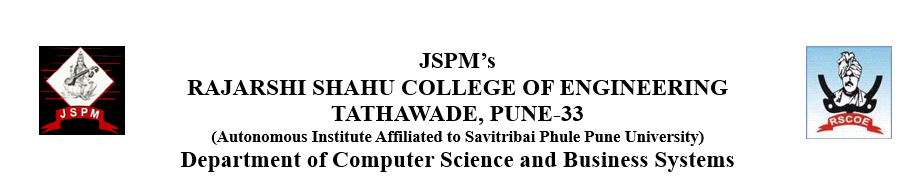

### Name: Gitanjali Govardhan Shinde

### PRN No.: RBT21CB068

## Problem Statement:
Breast cancer is a critical healthcare concern, and early and accurate detection is crucial for effective treatment. Machine learning models can play a pivotal role in improving the accuracy of breast cancer classification. In this practical, we aim to compare the performance of two widely used classification algorithms, Naive Bayes and Support Vector Machine (SVM), in diagnosing breast cancer based on patient data.




### Aim:
The primary aim of this practical is to assess and compare the effectiveness of Naive Bayes and SVM models in classifying breast tumors as benign or malignant using the breast cancer dataset. We seek to determine which of these machine learning algorithms offers superior accuracy and reliability for early cancer detection.

## Introduction:

In this mini project, we aim to demonstrate the effectiveness of two popular machine learning algorithms, Naive Bayes and Support Vector Machine (SVM), in the context of breast cancer detection using a well-known breast cancer dataset. Breast cancer is a critical healthcare concern, and early and accurate detection is crucial for successful treatment.

The project focuses on classifying breast tumors as either benign or malignant based on various features and characteristics of the tumor cells. Naive Bayes is a probabilistic classification algorithm that works well with relatively simple and high-dimensional datasets, making it a good candidate for this task. SVM, on the other hand, is a powerful classification algorithm that can handle complex decision boundaries and is well-suited for binary classification problems like breast cancer detection.

#### **Through this project, we will:**

1. Preprocess and analyze the breast cancer dataset to understand its structure and characteristics.

2. Implement Naive Bayes and SVM classifiers to build models for breast cancer classification.

3. Train these models using the dataset, taking into account different hyperparameters and data splitting strategies.

4. Evaluate the performance of both Naive Bayes and SVM in terms of accuracy, precision, recall, and F1-score, comparing their effectiveness in distinguishing benign and malignant tumors.

5. Visualize the results to gain insights into the strengths and weaknesses of each algorithm.

By the end of this mini project, we aim to showcase the comparative performance of Naive Bayes and SVM in breast cancer detection and provide a valuable resource for understanding how different machine learning techniques can be applied to real-world medical diagnosis problems.

In [ ]:
# Import necessary libraries for text preprocessing
import pandas as pd

import matplotlib.pyplot as plt


import seaborn as sns


from sklearn.model_selection import train_test_split


from sklearn.naive_bayes import MultinomialNB


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv("data.csv")

df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


## Step1 Data Analysis and preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df = df.drop(["id"],axis=1)

df = df.drop(["Unnamed: 32"],axis=1)

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
M = df[df.diagnosis== "M"]

B = df[df.diagnosis == "B"]

## Step2  Data Visualization
*Data Overview* :
Before diving into the code, let's take a look at some basic statistics about the dataset.

*Data Visualization* :
We create data visualizations to understand the distribution of Malignant and Benign tumor in the dataset.

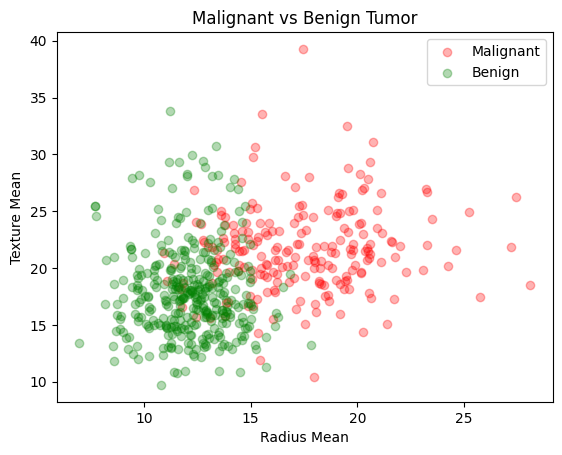

In [ ]:
plt.title("Malignant vs Benign Tumor")

plt.xlabel("Radius Mean")

plt.ylabel("Texture Mean")

plt.scatter(M.radius_mean, M.texture_mean, color = "red", label = "Malignant", alpha = 0.3)

plt.scatter(B.radius_mean, B.texture_mean, color = "green", label = "Benign", alpha = 0.3)

plt.legend()

plt.show()

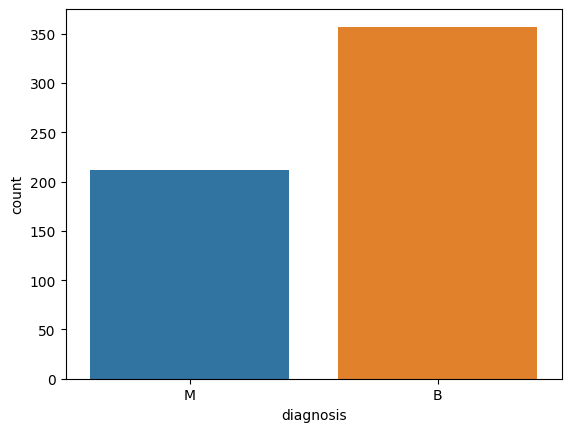

In [ ]:
sns.countplot(x = df['diagnosis']);

In [ ]:
import plotly.express as px
grafico = px.scatter_matrix(df, dimensions=['radius_mean', 'texture_mean','perimeter_mean','area_mean','smoothness_mean'], color = 'diagnosis')
grafico.show()

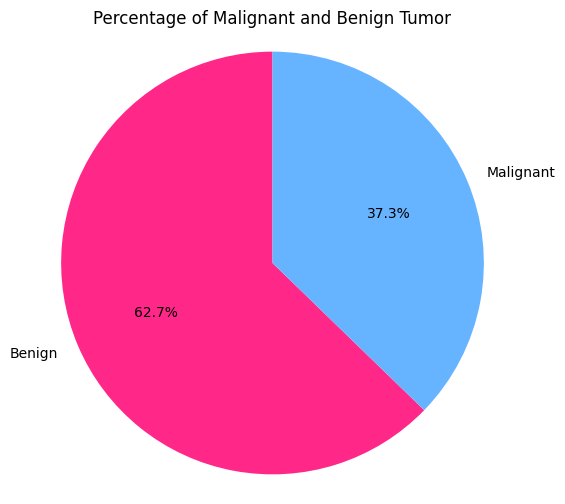

In [ ]:

# Count the number of Malignant and Benign Tumor
M_count = df['diagnosis'].value_counts()[1]
B_count = df['diagnosis'].value_counts()[0]

# Create a pie chart to show the percentage of Malignant and Benign Tumor
plt.figure(figsize=(6, 6))
labels = ['Benign', 'Malignant']

sizes = [B_count, M_count]
colors = ['#ff2889', '#66b3ff']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Malignant and Benign Tumor')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Naive Bayes
###### The Naive Bayes algorithm is a fundamental and widely-used machine learning algorithm for classification and probabilistic modeling. It is based on Bayes' theorem, which is a fundamental concept in probability theory. The "naive" in Naive Bayes comes from the assumption that all features are independent of each other, which is often not entirely accurate but simplifies the modeling process.
###### Bayes' Theorem: The foundation of Naive Bayes, Bayes' theorem, is a mathematical formula that allows us to update the probability for a hypothesis as more evidence or information becomes available.

###### Independence Assumption: Naive Bayes assumes that the features used to make a classification decision are conditionally independent, meaning that the presence of one feature does not affect the presence of another.
### Baye's Theorem: 1.svg

In [ ]:
X = df.drop(["diagnosis"], axis = 1)
y = df.diagnosis.values

## Step3 Naive Bayes Modele Training

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_data = StandardScaler()

X_data = scaler_data.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

from sklearn.naive_bayes import GaussianNB
# Train and evaluate Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Predict using Naive Bayes model
nb_predictions = nb.predict(X_test)

# Evaluate Naive Bayes model
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_classification_report = classification_report(y_test, nb_predictions)
nb_confusion_matrix = confusion_matrix(y_test, nb_predictions)

print("\nNaive Bayes Accuracy:", nb_accuracy)
print("\nNaive Bayes Classification Report:\n", nb_classification_report)
print("\nNaive Bayes Confusion Matrix:\n", nb_confusion_matrix)
print("Naive Bayes score: ",nb.score(X_test, y_test))



Naive Bayes Accuracy: 0.9473684210526315

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           B       0.95      0.96      0.96       108
           M       0.94      0.92      0.93        63

    accuracy                           0.95       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171


Naive Bayes Confusion Matrix:
 [[104   4]
 [  5  58]]
Naive Bayes score:  0.9473684210526315


## Step4  Visualization of Results

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names



0.9473684210526315

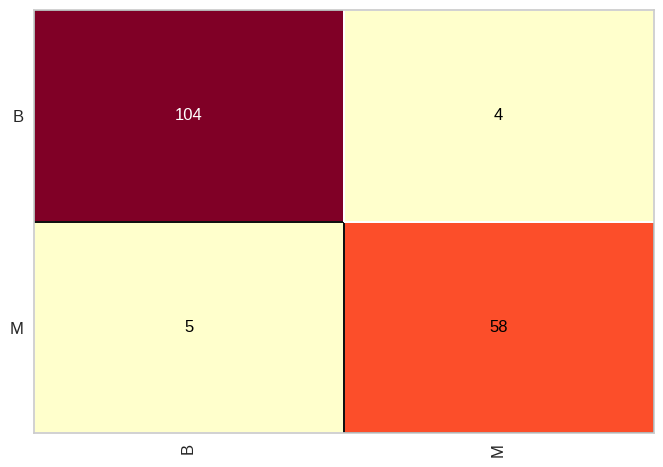

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(nb)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

# SVM(Support Vector Machine):
A Support Vector Machine (SVM) is a powerful machine learning algorithm. It is a supervised learning method that excels in binary classification tasks, where the goal is to distinguish between two classes. SVM works by finding the optimal hyperplane that maximizes the margin between these two classes, making it an effective tool for accurate and efficient breast cancer detection. This mini-project will explore the application of SVM in identifying and classifying breast tumors, contributing to improved early diagnosis and treatment.

We can evaluate SVM performance using the following metrics:
* Accuracy
* Classification Report (Precision, Recall, F1-score)
* Confusion Matrix

## Step5 SVM Model Training

In [ ]:
from sklearn.svm import SVC

from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train and evaluate SVM model
svm_model = SVC(kernel='linear')

svm_model.fit(X_train, y_train)


# Predict using SVM model
svm_predictions = svm_model.predict(X_test)


# Evaluate SVM model
svm_accuracy = accuracy_score(y_test, svm_predictions)

svm_classification_report = classification_report(y_test, svm_predictions)

svm_confusion_matrix = confusion_matrix(y_test, svm_predictions)


print("SVM Accuracy:", svm_accuracy)


print("\nSVM Classification Report:\n", svm_classification_report)


print("\nSVM Confusion Matrix:\n", svm_confusion_matrix)

SVM Accuracy: 0.9532163742690059

SVM Classification Report:
               precision    recall  f1-score   support

           B       0.95      0.98      0.96       108
           M       0.97      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171


SVM Confusion Matrix:
 [[106   2]
 [  6  57]]


## Step6  Visualization of Results

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



0.9532163742690059

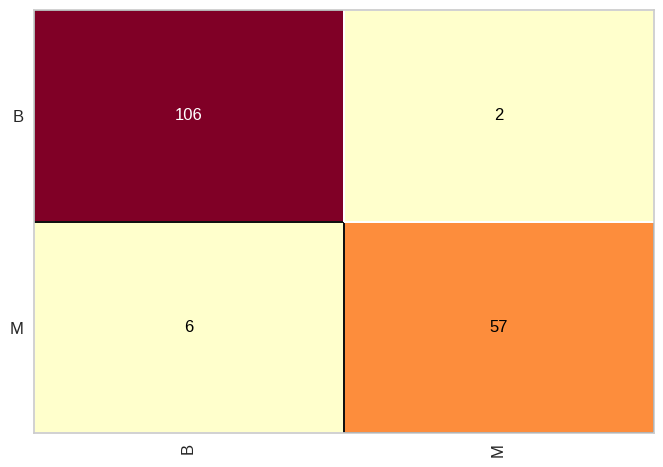

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


from yellowbrick.classifier import ConfusionMatrix


cm = ConfusionMatrix(svm_model)


cm.fit(X_train, y_train)


cm.score(X_test, y_test)

# **Conclusion**
*Naive Bayes:*


1. Accuracy: 94.73%
2. F1-score for Malignant Tumor: 93%
3. F1-score for Benign Tumor: 96%


*Support Vector Machine (SVM):*


1. Accuracy: 95.32%
2. F1-score for Malignant Tumor: 93%
3. F1-score for Benign Tumor: 96%


These results indicate that the SVM classifier outperformed the Naive Bayes classifier in terms of accuracy and precision. The project successfully demonstrated the effectiveness of both models for breast cancer detection, with support vector machine showing higher accuracy and a balanced performance in distinguishing between  Malignant and Benign Tumor.
